# COP 4045 - Python Programming - Dr. Marques - Summer 2021

# Assignment 10: Introducing the Python Data Science stack
## 
COP 4045 - Python Programming - Dr. Oge Marques - FAU - Summer 2021
_________________
Name:     Anthony Polese

Z Number: Z23582157

Due:      2 August 2021

Note:     Everything done by Anthony Polese
_________________

### Goals 

- To acquire a basic understanding of the Python "data science stack" (NumPy, Pandas, Matplotlib, Scikit-Learn).
- To have an early experience of manipulating, summarizing, and visualizing small datasets. 
- To demonstrate the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.
- To learn how to implement several different machine learning classification models in Python 
- To learn how to test a model and produce a set of plots and performance measures

### Instructions

- This assignment is structured in two parts.
- For each part, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- The number of points is indicated next to each part. They add up to 100.
- There are additional (10 points worth of) bonus items, which are, of course optional.

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 
- Remember: this is an early exercise in exploring datasets; learning the syntax and "tricks" of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to use data to test simple hypotheses, produce answers to simple questions, or make predictions.


---------
### Imports + Google Drive

In [1]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from __future__ import division
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [2]:
# OPTIONAL 
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

-------------------
## Part 1: EDA

The Python code below will load a dataset containing the salaries and demographic data of more than 1000 employees of a hypothetical company, available in the file *salaries.csv*, which is a simple comma-separated list of labels and values.

In [3]:
#salaries = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/salaries.csv') 
#salaries = pd.read_csv('./data/salaries.csv') 

from google.colab import files
uploaded = files.upload()
import io
salaries = pd.read_csv(io.StringIO(uploaded['salaries.csv'].decode('utf-8')))

Saving salaries.csv to salaries.csv


In [4]:
print(salaries.shape)
print(salaries.count())

(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


In [5]:
salaries.head()

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white


In [6]:
salaries.describe()

,earn,height,ed,age
count,1192.000000,1192.000000,1192.000000,1192.000000
mean,23154.773490,66.915154,13.504195,41.378356
std,19472.296925,3.853968,2.420175,15.867428
min,200.000000,57.503219,3.000000,18.000000
25%,10000.000000,64.009746,12.000000,29.000000
50%,20000.000000,66.451265,13.000000,38.000000
75%,30000.000000,69.848100,16.000000,51.000000
max,200000.000000,77.051282,18.000000,91.000000


--------------------
### Summary statistics and correlations

Let's explore the dataset by plotting some graphs and displaying summary statistics. 

The code below should display:
- Min, max, average, and median salary (global)
- A histogram of salaries
- A scatterplot correlating salaries and years of education
- The (Pearson) correlation coefficient between the two variables.

This should help us get started.

In [7]:
salary = np.array(salaries['earn'])
print("--- Salary statistics ---")
print("Minimum salary (global): ${:6.2f}".format(np.min(salary)))
print("Maximum salary (global): ${:6.2f}".format(np.max(salary)))
print("Average salary (global): ${:6.2f}".format(np.mean(salary)))
print("Median  salary (global): ${:6.2f}".format(np.median(salary)))

--- Salary statistics ---
Minimum salary (global): $200.00
Maximum salary (global): $200000.00
Average salary (global): $23154.77
Median  salary (global): $20000.00


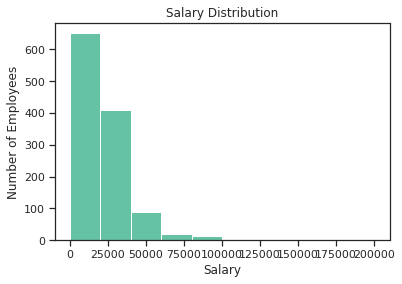

In [8]:
plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

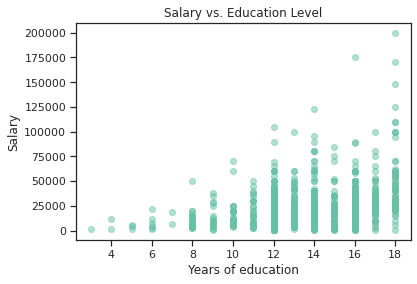

In [9]:
years = np.array(salaries['ed'])
plt.title('Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of education');
plt.scatter(years, salary, alpha=0.5)
plt.show()

In [10]:
# Compute Pearson coefficient
corr, _ = pearsonr(salary,years)
print('Correlation coefficient: ',corr)

Correlation coefficient:  0.3399765246894847


The [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) (a value between -1 and 1) can be used to summarize the strength of the linear relationship between two data samples.

A simplified way to interpret the result is (see table 1 [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/)):
- A value of 0 means no correlation
- Values below -0.5 or above 0.5 indicates a notable (negative/positive) correlation

### 1.1 Your turn! (10-14 points)

Write code to:

1. Display the total headcount and the number (and %) of male and female employees. (2 pts)
2. Compute and display the min, max, average, and median salary *per gender*. (8 pts)
3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (*if any is present*) associated with the salaries in the company. (<= 4 bonus points)


In [11]:
#task 1
gender_array = salaries['sex']

#total headcount
total_count = salaries.shape[0]
#gender headcount
female_count      = sum(gender_array == "female")
male_count        = sum(gender_array == "male")
female_percentage = (female_count/total_count) * 100
male_percentage   = (male_count/total_count) * 100

#display results
print("Headcount:                   ", total_count)
print("Number of female workers:    ", female_count)
print("Number of male workers:      ", male_count)
print("Percentage of female workers: {:.2f}%".format(female_percentage))
print("Percentage of male workers:   {:.2f}%".format(male_percentage))

#task 2
female_array = salaries[salaries['sex'] == 'female'] #records for all female employees
male_array   = salaries[salaries['sex'] == 'male']   #records for all male employees

female_salary_array = np.array(female_array['earn']) #array of salaries of female employees
male_salary_array   = np.array(male_array['earn'])   #array of salaries of male employees

female_salary_stats_dict = {'min':     np.min(female_salary_array),
                            'max':     np.max(female_salary_array),
                            'average': np.mean(female_salary_array),
                            'median':  np.median(female_salary_array)}
male_salary_stats_dict =   {'min':     np.min(male_salary_array),
                            'max':     np.max(male_salary_array),
                            'average': np.mean(male_salary_array),
                            'median':  np.median(male_salary_array)}
salary_stats_dict =        {'female':  female_salary_stats_dict,
                            'male':    male_salary_stats_dict}

#display results
print("\n")
print("Female salary statistics: ")
print("-" * 30)
print("Minimum: {:.2f}".format(salary_stats_dict['female']['min']))
print("Maximum: {:.2f}".format(salary_stats_dict['female']['max']))
print("Average: {:.2f}".format(salary_stats_dict['female']['average']))
print("Median:  {:.2f}".format(salary_stats_dict['female']['median']))
print("\n")
print("Male salary statistics: ")
print("-" * 30)
print("Minimum: {:.2f}".format(salary_stats_dict['male']['min']))
print("Maximum: {:.2f}".format(salary_stats_dict['male']['max']))
print("Average: {:.2f}".format(salary_stats_dict['male']['average']))
print("Median:  {:.2f}".format(salary_stats_dict['male']['median']))

Headcount:                    1192
Number of female workers:     687
Number of male workers:       505
Percentage of female workers: 57.63%
Percentage of male workers:   42.37%


Female salary statistics: 
------------------------------
Minimum: 200.00
Maximum: 123000.00
Average: 18280.20
Median:  15000.00


Male salary statistics: 
------------------------------
Minimum: 1000.00
Maximum: 200000.00
Average: 29786.13
Median:  25000.00


*Enter your text here*

--------------------
### Signs of inequality

As you can possibly tell by now, this dataset may help us test hypotheses and answer questions related to possible sources of inequality associated with the salary distribution: gender, age, race, etc.. 

Let's assume, for the sake of argument, that the number of years of education should correlate well with a person's salary (this is clearly a weak argument and the plot and Pearson correlation coefficient computation above suggests that this is *not* the case) and that other suspiciously high (positive or negative) correlations could be interpreted as a sign of inequality.

See Notebooks 1 and 2 from [my ICMLA 2019 tutorial with Christian Garbin](https://github.com/fau-masters-collected-works-cgarbin/ieee-icmla-2019-data-science-tutorial) for additional insights.

---------------------
### Hypotheses H1, H2, H3
At this point, we will formulate 3 different hypotheses that might suggest that the salary distribution is biased by factors such as age, gender, or race:

- H1: Older employees are paid less (i.e., ageism)
- H2: Female employees are paid less (i.e., gender bias)
- H3: Non-whites are paid less (i.e, race bias).

### 1.2 Your turn! (24-30 points)

Write Python code to test hypotheses H1, H2, and H3 (and some text to explain whether they were confirmed or not). 

Feel free to (also) use plots, but make your code independent of a human being interpreting those plots. 

**Weight**: 24 pts, i.e., 8 pts per hypothesis. 
Up to 6 bonus points for insightful additional hypotheses, code, and/or comments.  

H1:

**Results:**
The data does suggest some form of age discrimination, as there does seem to be some degree of correlation between age and salary; however, according to the Pearson correlation coefficient (0.3190), it is a weak correlation.
Nonetheless, looking at the table does show pretty clearly that the average salary seems to peak around 48 to 57, and then starts to fall back down, despite the fact that each age group has, on average, the same years of education.

**Notes on the data:**
It should be noted that modifications were made to the data to remove outliers that could skew the analysis.
People who make less than $10,000/year, people over the age of 77, and people with under 12 years of education were all removed from the data.

The salary cutoff was instated to ensure that the employees we analyze are full-time employees. Assuming that someone makes the federal minimum wage of 7.25/hr and worked 5 days a week, 4 weeks a month, 12 months a year, they would make $13920 per year, so this should leave enough room to ensure that all full-time employees are included but no one else.

The age cutoff was instated because there are simply not a lot of workers above the age of 77, so when looking at the data for those specific age groups, the analyses would not be very meaningful because the sample pool is so small.

The education cutoff was instated to 12 years of education is generally required in most countries. Any amount less is an outlier or a typo.

In [12]:
#cutoff values (justified in text above)
salary_cutoff = 10000 
age_cutoff    = 77
ed_cutoff     = 12
#removing records below salary cutoff
lower_salaries    = salaries['earn'] < salary_cutoff
cleaned_salaries  = salaries[~lower_salaries] #salary data only for workers above salary_cutoff
#removing records above age cutoff
older_salaries    = cleaned_salaries['age'] > age_cutoff
cleaned_salaries  = cleaned_salaries[~older_salaries]
#removing records below ed cutoff
below_ed_salaries = cleaned_salaries['ed'] < ed_cutoff
cleaned_salaries  = cleaned_salaries[~below_ed_salaries]

# Compute Pearson coefficient for salary and years of education
salary = np.array(cleaned_salaries['earn'])
years = np.array(cleaned_salaries['ed'])
corr_H1, _ = pearsonr(salary,years)

print('Correlation coefficient: {:.4f}'.format(corr_H1))

#salaries for employees between 18-27
salaries_gte_18   = cleaned_salaries[cleaned_salaries['age'] >= 18]
salaries_18_27    = salaries_gte_18[salaries_gte_18['age'] < 28]
#salaries for employees between 28-37
salaries_gte_28   = cleaned_salaries[cleaned_salaries['age'] >= 28]
salaries_28_37    = salaries_gte_28[salaries_gte_28['age'] < 38]
#salaries for employees between 38-47
salaries_gte_38   = cleaned_salaries[cleaned_salaries['age'] >= 38]
salaries_38_47    = salaries_gte_38[salaries_gte_38['age'] < 48]
#salaries for employees between 48-57
salaries_gte_48   = cleaned_salaries[cleaned_salaries['age'] >= 48]
salaries_48_57    = salaries_gte_48[salaries_gte_48['age'] < 58]
#salaries for employees between 58-67
salaries_gte_58   = cleaned_salaries[cleaned_salaries['age'] >= 58]
salaries_58_67    = salaries_gte_58[salaries_gte_58['age'] < 68]
#salaries for employees between 68-77
salaries_gte_68   = cleaned_salaries[cleaned_salaries['age'] >= 68]
salaries_68_77    = salaries_gte_68[salaries_gte_68['age'] < 78]
#salaries for employees between 78-87
#salaries_gte_78   = cleaned_salaries[cleaned_salaries['age'] >= 78]
#salaries_78_87    = salaries_gte_78[salaries_gte_78['age'] < 88]
#salaries for employees between 88-97
#salaries_gte_88   = cleaned_salaries[cleaned_salaries['age'] >= 88]
#salaries_88_97    = salaries_gte_88[salaries_gte_88['age'] < 98]

print("\n", end="")
print("-"*55)
print("          Avg. salary   Avg. education   # of people")
print("18 to 27: ${:.2f}     {:.0f} years         {}".format(np.mean(salaries_18_27['earn']), \
                                                             np.mean(salaries_18_27['ed']), \
                                                             len(salaries_18_27)))
print("28 to 37: ${:.2f}     {:.0f} years         {}".format(np.mean(salaries_28_37['earn']), \
                                                             np.mean(salaries_28_37['ed']), \
                                                             len(salaries_28_37)))
print("38 to 47: ${:.2f}     {:.0f} years         {}".format(np.mean(salaries_38_47['earn']), \
                                                             np.mean(salaries_38_47['ed']), \
                                                             len(salaries_38_47)))
print("48 to 57: ${:.2f}     {:.0f} years         {}".format(np.mean(salaries_48_57['earn']), \
                                                             np.mean(salaries_48_57['ed']), \
                                                             len(salaries_48_57)))
print("58 to 67: ${:.2f}     {:.0f} years         {}".format(np.mean(salaries_58_67['earn']), \
                                                             np.mean(salaries_58_67['ed']), \
                                                             len(salaries_58_67)))
print("68 to 77: ${:.2f}     {:.0f} years         {}".format(np.mean(salaries_68_77['earn']), \
                                                             np.mean(salaries_68_77['ed']), \
                                                             len(salaries_68_77)))
print("-"*55)
#print("78 to 87: ${:.2f}     {:.0f} years         {}".format(np.mean(salaries_78_87['earn']), \
#                                                             np.mean(salaries_78_87['ed']), \
#                                                             len(salaries_78_87)))
#print("88 to 97: ${:.2f}     {:.0f} years         {}".format(np.mean(salaries_88_97['earn']), \
#                                                             np.mean(salaries_88_97['ed']), \
#                                                             len(salaries_88_97)))



Correlation coefficient: 0.3248

-------------------------------------------------------
          Avg. salary   Avg. education   # of people
18 to 27: $21377.86     14 years         140
28 to 37: $26595.48     14 years         289
38 to 47: $31780.32     14 years         223
48 to 57: $35963.73     14 years         102
58 to 67: $28959.46     14 years         74
68 to 77: $21744.68     14 years         47
-------------------------------------------------------


H2:

**Results:**

The results overall showed that women are paid 70 cents for every dollar a man is paid. To ensure that this was not the result of a racial bias, I attempted to keep that variable constant by also checking female-to-male median salaries per race. The results were pretty similar, except for the black female-to-male median salary ratio, which was 0.94; however, the non-white races have very small representation at this company, with no non-white race exceeding 100 employees total. Small samples sizes like that can be prone to error. Despite this, the white staff is considerably larger in numbers and the white female-to-male median salary ratio does further support the hypothesis that this company has a gender bias, with a 0.67 ratio.

**Notes on the data:**

According to ["What is the gender pay gap and is it real?"](https://www.epi.org/publication/what-is-the-gender-pay-gap-and-is-it-real/), a good way to compare salary between gender is through median salary, as opposed to average salary, because the averages can be skewed by outliers. Despite this, I did still use the previous, cleaned-up dataset that had a salary cutoff of $10,000, an age cutoff of 77, and an education cutoff of 12 years just to further remove outliers that could skew the results.

In [13]:
#salary data by gender
cleaned_female_array         = cleaned_salaries[cleaned_salaries['sex'] == 'female']
cleaned_male_array           = cleaned_salaries[cleaned_salaries['sex'] == 'male']
#salaries of specific gender
cleaned_female_salary_array  = cleaned_female_array['earn']
cleaned_male_salary_array    = cleaned_male_array['earn']
#median salary for specific gender
cleaned_female_salary_median = np.median(cleaned_female_salary_array)
cleaned_male_salary_median   = np.median(cleaned_male_salary_array)

#ratio of female/male median salary
f_over_m_median_salary = cleaned_female_salary_median/cleaned_male_salary_median

#median salary by gender and race
#female
white_female    = cleaned_female_array[cleaned_female_array['race'] == 'white']
black_female    = cleaned_female_array[cleaned_female_array['race'] == 'black']
hispanic_female = cleaned_female_array[cleaned_female_array['race'] == 'hispanic']
other_female    = cleaned_female_array[cleaned_female_array['race'] == 'other']

#male
white_male    = cleaned_male_array[cleaned_male_array['race'] == 'white']
black_male    = cleaned_male_array[cleaned_male_array['race'] == 'black']
hispanic_male = cleaned_male_array[cleaned_male_array['race'] == 'hispanic']
other_male    = cleaned_male_array[cleaned_male_array['race'] == 'other']

#race-specific female:male median salary ratio
white_f_over_m_median_salary    = np.median(white_female['earn'])    / np.median(white_male['earn'])
black_f_over_m_median_salary    = np.median(black_female['earn'])    / np.median(black_male['earn'])
hispanic_f_over_m_median_salary = np.median(hispanic_female['earn']) / np.median(hispanic_male['earn'])
other_f_over_m_median_salary    = np.median(other_female['earn'])    / np.median(other_male['earn'])

#display median salary ratios
print("Overall Female/Male Median Salary Ratio:  {:.2f}".format(f_over_m_median_salary))
print("\n", end="")
print("White Female/Male Median Salary Ratio:    {:.2f}".format(white_f_over_m_median_salary))
print("Black Female/Male Median Salary Ratio:    {:.2f}".format(black_f_over_m_median_salary))
print("Hispanic Female/Male Median Salary Ratio: {:.2f}".format(hispanic_f_over_m_median_salary))
print("Other Female/Male Median Salary Ratio:    {:.2f}".format(hispanic_f_over_m_median_salary))

#display number of employees per race
print("\n", end="")
print("# of white employees: ")
print("   Female: {}\n   Male:   {}".format(len(white_female), len(white_male)))
print("# of black employees: ")
print("   Female: {}\n   Male:   {}".format(len(black_female), len(black_male)))
print("# of hispanic employees: ")
print("   Female: {}\n   Male:   {}".format(len(hispanic_female), len(hispanic_male)))
print("# of other employees: ")
print("   Female: {}\n   Male:   {}".format(len(other_female), len(other_male)))

Overall Female/Male Median Salary Ratio:  0.70

White Female/Male Median Salary Ratio:    0.67
Black Female/Male Median Salary Ratio:    0.94
Hispanic Female/Male Median Salary Ratio: 0.71
Other Female/Male Median Salary Ratio:    0.71

# of white employees: 
   Female: 393
   Male:   341
# of black employees: 
   Female: 50
   Male:   30
# of hispanic employees: 
   Female: 24
   Male:   22
# of other employees: 
   Female: 8
   Male:   7


H3:

Results:
The results suggest a racial wage gap. Both the median and average non-white salary are less than the median and avaerage white salary, respectively. Both the median and average also have equal median and average years of education. 

I did want to try to make a table of median or average salary by race divided into groups by years of education to help hold that variable constant, but unfortunately, there is not enough data to make this realistic. There are 634 white employee data samples but only 141 non-white employee data samples. Once divided into groups by years of education, the non-white groups will get even smaller and less reliable. 

Similarly, checking by individual race as opposed to white vs non-white has a similar problem. There is simply not enough employee data samples for non-white employees, especially the "other" race group.
The race counts are as follows:
* White:    634
* Black:    80
* Hispanic: 46
* Other: 15

Despite all this, the results do strongly suggest that there is a racial wage gap at this company.

Notes on the data:
As per the other hypotheses, I use the cleaned-up dataset that has a salary cutoff of $10,000, an age cutoff of 77, and an education cutoff of 12 years just to further remove outliers that could skew the results.

In [14]:
#H3: Non-whites are paid less (i.e, race bias).

#full data for whites and non-whites
white_salaries     = cleaned_salaries[cleaned_salaries['race'] == 'white']
non_white_salaries = cleaned_salaries[cleaned_salaries['race'] != 'white']

#median and average salaries for whites and non-whites
white_salary_stats_dict =     {'median':    np.median(white_salaries['earn']), \
                               'average':   np.average(white_salaries['earn'])}
non_white_salary_stats_dict = {'median':    np.median(non_white_salaries['earn']), \
                               'average':   np.average(non_white_salaries['earn'])}

#combining dictionaries
salary_stats_dict =           {'white':     white_salary_stats_dict, \
                               'non_white': non_white_salary_stats_dict}

#median and average years of education for whites and non-whites
white_ed_stats_dict =         {'median':    np.median(white_salaries['ed']), \
                               'average':   np.average(white_salaries['ed'])}
non_white_ed_stats_dict =     {'median':    np.median(non_white_salaries['ed']), \
                               'average':   np.average(non_white_salaries['ed'])}

#combining dictionaries
salary_ed_dict =              {'white':     white_ed_stats_dict, \
                               'non_white': non_white_ed_stats_dict}


#display results
print("           Median Salary   Median Years of Education")
print("White      ${:.0f}          {:.0f}".format(salary_stats_dict['white']['median'], \
                                                  salary_ed_dict['white']['median']))
print("Non-white  ${:.0f}          {:.0f}".format(salary_stats_dict['non_white']['median'], \
                                                      salary_ed_dict['non_white']['median']))

print("-"*50)
print("           Average Salary  Average Years of Education")
print("White      ${:.0f}          {:.0f}".format(salary_stats_dict['white']['average'], \
                                                 salary_ed_dict['white']['average']))
print("Non-white  ${:.0f}          {:.0f}".format(salary_stats_dict['non_white']['average'], \
                                                  salary_ed_dict['non_white']['average']))




           Median Salary   Median Years of Education
White      $24000          14
Non-white  $22000          14
--------------------------------------------------
           Average Salary  Average Years of Education
White      $28824          14
Non-white  $24414          14


-------------------
## Part 2: Classification

### 2a. Iris flower classification

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each: 
- sepal length in cm; 
- sepal width in cm; 
- petal length in cm; and 
- petal width in cm. 

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Histograms, pair plots and summary statistics 

The code below:

1. Computes and displays relevant summary statistics for the whole dataset.
2. Displays the pair plots for all (4) attributes for all (3) categories / species / classes in the Iris dataset. 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


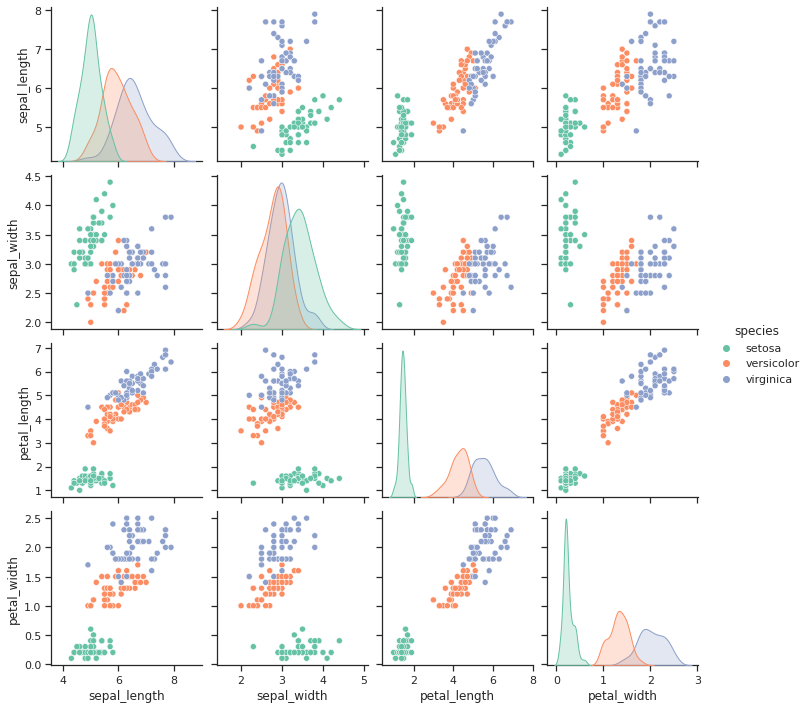

In [16]:
# Display pair plot
sns.pairplot(iris, hue='species', height=2.5);

# Display summary statistics for the whole dataset
iris.describe()

#### 2.1 Your turn! (25 points)
Write code to: 

1. Build a decision tree classifier using scikit-learn's `DecisionTreeClassifier` (using the default options). Check documentation at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 
2. Plot the resulting decision tree. 
(Note: if `graphviz` gives you headaches, a text-based 'plot'-- using `export_text` -- should be OK.)
3. Perform k-fold cross-validation using k=3 and display the results. 


References:
* Help in figuring out how to use DecisionTreeClassifier from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* Help in using scikit learn's export_text from https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html
* Help in figuring out how to use k-fold cross-validation from https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/
* Help in figuring out how to use k-fold cross-validation from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_text
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

X = iris.iloc[:,:-1] #data
y = iris.iloc[:,-1]  #species classification

#setting up training data set and testing data set
Xtrain, Xtest, ytrain, ytest = \
    train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

#making decision tree classifier, trained on xtrain and y train
dtc = tree.DecisionTreeClassifier(random_state=42)
dtc.fit(Xtrain, ytrain)

#display decision tree
r = export_text(dtc, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print('Decision Tree:\n')
print(r)

#3-fold cross validiation
cv = KFold(n_splits=3, random_state=1, shuffle=True)
scores = cross_val_score(dtc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
#displaying results of 3-fold cross validation testing
print('\n')
print('3-Fold Cross Validation Test Results')
print('-' * 40)
for i in range(len(scores)):
    print('Test  {:d}:   {:.2f}'.format(i + 1, scores[i]))
print('\n', end='')
print('Average:   {:.3f}'.format(mean(scores)))
print('Std. Dev.: {:.3f}'.format(std(scores)))

Decision Tree:

|--- petal_length <= 2.45
|   |--- class: setosa
|--- petal_length >  2.45
|   |--- petal_length <= 4.85
|   |   |--- petal_width <= 1.65
|   |   |   |--- class: versicolor
|   |   |--- petal_width >  1.65
|   |   |   |--- sepal_length <= 6.05
|   |   |   |   |--- class: versicolor
|   |   |   |--- sepal_length >  6.05
|   |   |   |   |--- class: virginica
|   |--- petal_length >  4.85
|   |   |--- petal_width <= 1.70
|   |   |   |--- petal_length <= 4.95
|   |   |   |   |--- class: versicolor
|   |   |   |--- petal_length >  4.95
|   |   |   |   |--- sepal_width <= 2.75
|   |   |   |   |   |--- sepal_width <= 2.45
|   |   |   |   |   |   |--- class: virginica
|   |   |   |   |   |--- sepal_width >  2.45
|   |   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- sepal_width >  2.75
|   |   |   |   |   |--- class: virginica
|   |   |--- petal_width >  1.70
|   |   |   |--- class: virginica



3-Fold Cross Validation Test Results
---------------------------------

### 2b. Digit classification

The MNIST handwritten digit dataset consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each image in the dataset has 28$\times$28 pixels. 

The Python code below loads the images from the MNIST dataset, flattens them, normalizes them (i.e., maps the intensity values from [0..255] to [0..1]), and displays a few images from the training set.

In [18]:
from keras.datasets import mnist

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
y_train.shape

(60000,)

In [21]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

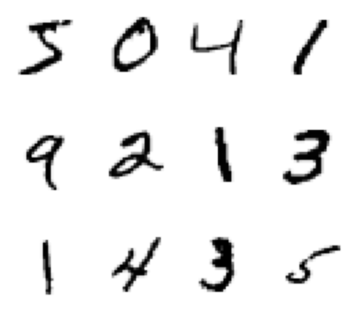

In [22]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [23]:
X_valid.shape

(10000, 28, 28)

In [24]:
y_valid.shape

(10000,)

In [25]:
y_valid[0]

7

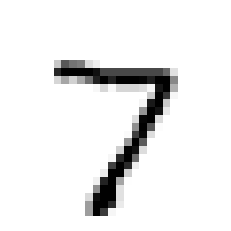

In [26]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [27]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [28]:
import tensorflow as tf
# convert class vectors to binary class matrices
y_training = tf.keras.utils.to_categorical(y_train, num_classes)
y_validation = tf.keras.utils.to_categorical(y_valid, num_classes)

In [29]:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


#### A baseline classifier

The code below is an example of how to:

1. Build and fit a 10-class Naive Bayes classifier using scikit-learn's `MultinomialNB()` with default options and using the raw pixel values as features. 
2. Make predictions on the test data, compute the overall accuracy, and plot the resulting confusing matrix.


In [30]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_training, y_train)
pred_labels = model.predict(X_validation)

In [31]:
pred_labels.shape

(10000,)

In [32]:
print(pred_labels)

[7 2 1 ... 9 8 6]


In [33]:
print(y_valid)

[7 2 1 ... 4 5 6]


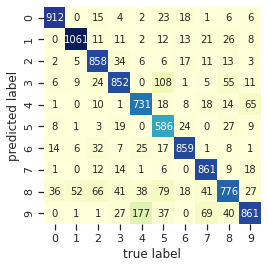

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
mat = confusion_matrix(y_valid, pred_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu")
plt.xlabel('true label')
plt.ylabel('predicted label');

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, pred_labels)

0.8357

#### 2.2 Your turn! (20 points)

Write code to: 

1. Build and fit a 10-class Random Forests classifier using scikit-learn's `RandomForestClassifier()` with default options (don't forget `random_state=0`) and using the raw pixel values as features. 
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. 

Hint: your accuracy should be > 90%

References:
* Help in figuring out how to set up RandomForestClassifier() and what its methods do: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Help in understanding what sns.heatmap() does: https://seaborn.pydata.org/generated/seaborn.heatmap.html

Number of classes:  10

Accuracy:  0.9705



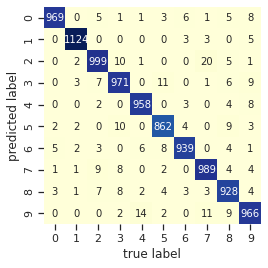

In [36]:
from sklearn.ensemble import RandomForestClassifier

#initialize Random Forest Classifier
model_2 = RandomForestClassifier(random_state=0, ) 
#build forest of trees from training set
model_2.fit(X_training, y_train)

#to confirm that the Random Forests classifier is 10-class 
print('Number of classes: ', model_2.n_classes_)
print('\n', end='')

#make predictions for X_validation
pred_labels_2 = model_2.predict(X_validation)

#make confusion matrix
mat_2 = confusion_matrix(y_valid, pred_labels_2)

#make colored matrix and set labels
sns.heatmap(mat_2.T, square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu")
plt.xlabel('true label')
plt.ylabel('predicted label');

#output accuracy of Random Forest Classifier
print('Accuracy: ', accuracy_score(y_valid, pred_labels_2))
print('\n', end='')

## Conclusions (21 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

**What have you learned from this assignment?**
------------------------------------------------
This assignment exposed me to a much more complex realm of data science. We had dealt with it before, to a degree, with the Iris data set and the diabetes data set; however, it seems our methods of utilizing the data were very elementary compared to a lot of the code in here.

Working on this assignment helped me gain a basic understanding of how to use Scikit Learn, Pandas, Numpy, and Seaborn. Finding mean, median, and standard deviation is much easier with these tools. It is also a lot simpler to cut out data that you don't want and to focus on data with certain attributes or qualities.

In a sense, I understand classifiers better, but it was really quite complex and detached from what we have learned throughout the rest of the semester. I wouldn't say I have "learned" how to use these classifier tools (especially conceptually), but the learning curve has definitely dropped by looking through the docuentation for these tools while figuring out how to get them to work. Classifiers will be less daunting in the future.

**Which parts were the most fun, time-consuming, enlightening, tedious?**
------------------------------------------------
The most time-consuming and most tedious task was the Hypotheses H1, H2, and H3 section. The tasks were all somewhat similar and I spent a lot of time manipulating the data in order to find the best ways to present the data in a compelling way and make a case for the hypotheses one way or another. There was a lot of trial and error. I would spend long amounts of time making big dictionaries of data to only realize the data would not be useful.

1.1 and 1.2 were the most enlightening because I understood them better than the classifier section. I could see many ways that the tools used in 1.1 and 1.2 could be used in the future to save time, and now I am fairly comfortable with them, so I will definitely look for ways to use Pandas and Numpy in the future.

The most fun section was probably 2.2 just because it is enjoyable to see a large amount of data be processed and used to do something, and then see the results presented in a visually-appealing table.

**What would you do if you had an additional week to work on this?**
------------------------------------------------
If I had an additional week to work on this assignment, I would add graphs to my 1.2 solutions (Hypotheses H1, H2, H3). 

I would also complete the optional task for 1.1: "Plot meaningful graphs that could provide insight into the gender inequality (if any is present) associated with the salaries in the company." because it is pretty similar to any graphs I could potentially make for H2 in 1.2, so doing this optional step would probably be quite easy if I were to make graphs for the hypotheses.

I would also try again to get "graphviz" to work instead of using "export_text".

#Works Cited:
* Akoglu, Haldun. “User's guide to correlation coefficients.” *Turkish journal of emergency medicine* vol. 18,3 91-93. 7 Aug. 2018, doi:10.1016/j.tjem.2018.08.001

* Brownlee, Jason. “How to Configure k-Fold Cross-Validation.” *Machine Learning Mastery*, 26 Aug. 2020, [machinelearningmastery.com/how-to-configure-k-fold-cross-validation/](https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/).  

* Gould, Elise, et al. “What Is the Gender Pay Gap and Is It Real?” *Economic Policy Institute*, 20 Oct. 2016, www.epi.org/publication/what-is-the-gender-pay-gap-and-is-it-real/. 

* Marques, Oge, and Christian Garbin. “IEEE ICMLA 2019 Data Science Tutorial.” *GitHub*, 10 Oct. 2020, [github.com/fau-masters-collected-works-cgarbin/ieee-icmla-2019-data-science-tutorial](https://github.com/fau-masters-collected-works-cgarbin/ieee-icmla-2019-data-science-tutorial). 

* “Sklearn.ensemble.randomforestclassifier.” *Scikit Learn*, [scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

* “Sklearn.tree.decisiontreeclassifier.” *Scikit Learn*, [scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

* “Sklearn.tree.export_text.” *Scikit Learn*, [scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html). 

* “Sklearn.model_selection.KFold.” *Scikit Learn*, [scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html). 

* Waskom, Michael. “Seaborn.heatmap.” *Seaborn.heatmap - Seaborn 0.11.1 Documentation*, [seaborn.pydata.org/generated/seaborn.heatmap.html](https://seaborn.pydata.org/generated/seaborn.heatmap.html). 